In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [30]:
from sklearn.metrics import classification_report

In [31]:
import pandas as pd
df=pd.read_csv("res01.csv",encoding="utf-8")

df=df.dropna(axis=0)


In [32]:
df.shape

(8000, 303)

In [33]:
dfnew=pd.read_csv("source_y.csv",encoding="utf-8")

df=pd.concat([df,dfnew],axis=1)

df["happiness"].value_counts()

df["happiness"]=df["happiness"].map({1:0,2:1,3:2,4:3,5:4})
df=pd.concat([df[df["happiness"]==3].sample(frac=0.3),df[df["happiness"]!=3]],axis=0)
label=df["happiness"]
df["newcol_1"]=1
df["newcol_2"]=0
del df["happiness"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [34]:
col=[]
for i in df.columns:
    col.append(i.split("_")[0])

import numpy as np
l=[]
first=0
last=0
colname=[]
for ind,i in enumerate(col):
    last+=1
    if last==len(col):
         
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         break
    if col[last]!=col[last-1]:
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
#          print (np.argmax(df[df.columns[first:last]].values,axis=1).max())
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         first=last
         last=last+1
         
#          break

      Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  Class_7  Class_8  \
347         0        1        0        0        0        0        0        0   
7349        0        0        0        1        0        0        0        0   
6081        0        0        0        1        0        0        0        0   
4811        0        0        0        0        1        0        0        0   
1475        0        1        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7987        0        0        0        1        0        0        0        0   
7992        0        0        0        0        1        0        0        0   
7995        0        0        0        0        1        0        0        0   
7996        0        0        1        0        0        0        0        0   
7998        0        0        0        0        0        1        0        0   

      Class_9  Class_10  
347         0

In [35]:
colname

['Class',
 'class_14',
 'equity',
 'public_service_cut',
 'socialize',
 'relax',
 'learn',
 'leisure_mean_cut',
 'media_mean_cut',
 'gender',
 'age_group',
 'edu_group',
 'bmi_cut',
 'edu_status_1',
 'health',
 'marital',
 'political',
 'religion',
 'hukou',
 'nationality',
 'family_status',
 'car',
 'house_cut_0',
 'is_invest',
 'insur_mean_1',
 'family_income_cut',
 's_income_cut',
 'income_cut',
 'floor_area_average_cut_1',
 'child_cut',
 'minor_child_cut',
 'f_edu',
 'm_edu',
 'f_political',
 'm_political',
 's_work_status_cut',
 'newcol']

In [36]:
colname[13]='edu_status'
colname[22]='house_cut'
colname[24]='insur_mean'
colname[28]='floor_area_average_cut'


In [37]:
colname

['Class',
 'class_14',
 'equity',
 'public_service_cut',
 'socialize',
 'relax',
 'learn',
 'leisure_mean_cut',
 'media_mean_cut',
 'gender',
 'age_group',
 'edu_group',
 'bmi_cut',
 'edu_status',
 'health',
 'marital',
 'political',
 'religion',
 'hukou',
 'nationality',
 'family_status',
 'car',
 'house_cut',
 'is_invest',
 'insur_mean',
 'family_income_cut',
 's_income_cut',
 'income_cut',
 'floor_area_average_cut',
 'child_cut',
 'minor_child_cut',
 'f_edu',
 'm_edu',
 'f_political',
 'm_political',
 's_work_status_cut',
 'newcol']

In [38]:
import pandas as pd

dfemd=pd.DataFrame()

embed_num=[]
for ind,i in enumerate(l):
    dfemd[ind]=i
    embed_num.append(len(dfemd[ind].unique())+2)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Input, Dropout, Bidirectional

from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import re
from tensorflow.keras.callbacks import Callback
import tensorflow
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn.model_selection import KFold


def get_deep_wide_net():
    embedall=[]
    for ind,i in enumerate(dfemd.columns):
         embedall.append(Embedding(100, 128, input_length=1,
                      trainable=True))

    len(embedall)

    input1 = Input(shape=(X_train.shape[1], )) #模型的入口,设置输入的维度
    embedl=[]
    for i in range(len(embedall)):
        embedl.append(Input(shape=(1,)))

    l=[]
    for i in range(len(embedl)):
        l.append(embedall[i](embedl[i]))

    embedcat=Concatenate()(l)

    embedcat=Dense(128,activation="relu")(embedcat)

    floatdense=Dense(128)(input1)
    embedcatnew=Flatten()(embedcat)

    last=Concatenate()([embedcatnew,floatdense])
    output1=Dense(128)(last)
    output = Dense(5, activation='softmax')(output1)#softmax层

    model = Model(inputs=[input1]+embedl, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#定义损失函数，优化器，评分标准
    model.summary()
    return model

In [39]:
from sklearn import metrics
recal_all=[]
pre_all=[]
f1_all=[]
acc_all=[]
f1_micro=[]

t_recal_all=[]
t_pre_all=[]
t_f1_all=[]
t_acc_all=[]
t_f1_micro=[]
k=5
kf = KFold(n_splits=k, shuffle=True)
#     tmppre=np.zeros(y.shape)
ind=0
for (train, test) in  kf.split(df.values):
        print ("fold",ind,"start")
        X_train=df.values[train]
        y_train=label.values[train]
        emd_train=dfemd.values[train]
        emd_test=dfemd.values[test]
        train_all=[]
        train_all.append(X_train)
        for ind in range(emd_train.shape[1]):
            train_all.append(np.expand_dims(emd_train[:,ind],axis=1))
            
       
        X_test=df.values[test]
        testall=[]
        testall.append(X_test)
        for ind in range(emd_test.shape[1]):
            testall.append(np.expand_dims(emd_test[:,ind],axis=1))
#         break
        y_test=label.values[test]
        X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
        X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])
        
        callbacks = [EarlyStopping(monitor='val_acc', verbose=1, patience=1000),
             ModelCheckpoint("model_wide_class_{}.hdf5".format(ind), monitor='val_acc',
                             mode='max', verbose=0, save_best_only=True,save_weights_only=True)]
        model_new = get_deep_wide_net()

        model_new.fit(train_all, y_train, epochs=20, batch_size=16, validation_data=(testall, y_test) ,callbacks=callbacks)
        model_new.load_weights("model_wide_class_{}.hdf5".format(ind)) #加载最优模型
        ypre=np.argmax(model_new.predict(testall),axis=-1)
        tmpacc=accuracy_score(y_test,ypre)
        tmppre=precision_score(y_test,ypre,average="macro")
        tmprecal=recall_score(y_test,ypre,average="macro")
        tmpf1=f1_score(y_test,ypre,average="macro")
        tmpf1_mic=f1_score(y_test,ypre,average="micro")
        print ("fold_{} acc: {} precision: {} recall : {} ,mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("test reprot: ",classification_report(y_test,ypre,digits=4))
        recal_all.append(tmprecal)
        acc_all.append(tmpacc)
        f1_all.append(tmpf1)
        pre_all.append(tmppre)
        f1_micro.append(tmpf1_mic)
        ind+=1

        ypre=np.argmax(model_new.predict(train_all),axis=-1)
        tmpacc=accuracy_score(y_train,ypre)
        tmppre=precision_score(y_train,ypre,average="macro")
        tmprecal=recall_score(y_train,ypre,average="macro")
        tmpf1=f1_score(y_train,ypre,average="macro")
        tmpf1_mic=f1_score(y_train,ypre,average="micro")
        print ("fold_{} train_acc: {} train_precision: {} train_recall : {},mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("train reprot: ",classification_report(y_train,ypre,digits=4))
        t_recal_all.append(tmprecal)
        t_acc_all.append(tmpacc)
        t_f1_all.append(tmpf1)
        t_pre_all.append(tmppre)
        t_f1_micro.append(tmpf1_mic)
    
print ("max acc:{}".format(max(acc_all)))
print ("min acc:{}".format(min(acc_all)))
print ("mean acc:{}".format(sum(acc_all)/5))


print ("max precision:{}".format(max(pre_all)))
print ("min precision:{}".format(min(pre_all)))
print ("mean precision:{}".format(sum(pre_all)/5))

print ("max recall:{}".format(max(recal_all)))
print ("min recall:{}".format(min(recal_all)))
print ("mean recall:{}".format(sum(recal_all)/5))



print ("max mac f1:{}".format(max(f1_all)))
print ("min mac f1:{}".format(min(f1_all)))
print ("mean mac f1:{}".format(sum(f1_all)/5))

print ("max mic f1:{}".format(max(f1_micro)))
print ("min mic f1:{}".format(min(f1_micro)))
print ("mean mic f1:{}".format(sum(f1_micro)/5))


print ("train max acc:{}".format(max(t_acc_all)))
print ("train min acc:{}".format(min(t_acc_all)))
print ("train mean acc:{}".format(sum(t_acc_all)/5))



print ("train max precision:{}".format(max(t_pre_all)))
print ("train min precision:{}".format(min(t_pre_all)))
print ("train mean precision:{}".format(sum(t_pre_all)/5))


print ("train max recall:{}".format(max(t_recal_all)))
print ("train min recall:{}".format(min(t_recal_all)))
print ("train mean recall:{}".format(sum(t_recal_all)/5))


print ("train max mac f1:{}".format(max(t_f1_all)))
print ("train min mac f1:{}".format(min(t_f1_all)))
print ("train mean mac f1:{}".format(sum(t_f1_all)/5))


print ("train max mic f1:{}".format(max(t_f1_micro)))
print ("train min mic f1:{}".format(min(t_f1_micro)))
print ("train mean mic f1:{}".format(sum(t_f1_micro)/5))

fold 0 start
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_192 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_193 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_194 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_195 (InputLayer)          [(None, 1)]          0                                            
_______________________________________________________________________________

Epoch 1/20
3701/3701 [==============================] - 15s 4ms/sample - loss: 1.2453 - acc: 0.4407 - val_loss: 1.1771 - val_acc: 0.4654
Epoch 2/20
3701/3701 [==============================] - 2s 651us/sample - loss: 1.1447 - acc: 0.4920 - val_loss: 1.1900 - val_acc: 0.4525
Epoch 3/20
3701/3701 [==============================] - 2s 627us/sample - loss: 1.1225 - acc: 0.5042 - val_loss: 1.1801 - val_acc: 0.4546
Epoch 4/20
3701/3701 [==============================] - 3s 686us/sample - loss: 1.0913 - acc: 0.5150 - val_loss: 1.1683 - val_acc: 0.4719
Epoch 5/20
3701/3701 [==============================] - 2s 672us/sample - loss: 1.0467 - acc: 0.5412 - val_loss: 1.1849 - val_acc: 0.4622
Epoch 6/20
3701/3701 [==============================] - 2s 668us/sample - loss: 1.0025 - acc: 0.5634 - val_loss: 1.2188 - val_acc: 0.4482
Epoch 7/20
3701/3701 [==============================] - 2s 672us/sample - loss: 0.9154 - acc: 0.6096 - val_loss: 1.2804 - val_acc: 0.4590
Epoch 8/20
3701/3701 [=============

Epoch 1/20
3701/3701 [==============================] - 22s 6ms/sample - loss: 1.2635 - acc: 0.4102 - val_loss: 1.1715 - val_acc: 0.4633
Epoch 2/20
3701/3701 [==============================] - 3s 872us/sample - loss: 1.1498 - acc: 0.4788 - val_loss: 1.1752 - val_acc: 0.4633
Epoch 3/20
3701/3701 [==============================] - 3s 928us/sample - loss: 1.1184 - acc: 0.4912 - val_loss: 1.1550 - val_acc: 0.4838
Epoch 4/20
3701/3701 [==============================] - 3s 880us/sample - loss: 1.0947 - acc: 0.5163 - val_loss: 1.1564 - val_acc: 0.4849
Epoch 5/20
3701/3701 [==============================] - 3s 708us/sample - loss: 1.0617 - acc: 0.5320 - val_loss: 1.1731 - val_acc: 0.4903
Epoch 6/20
3701/3701 [==============================] - 3s 719us/sample - loss: 1.0104 - acc: 0.5623 - val_loss: 1.2222 - val_acc: 0.4849
Epoch 7/20
3701/3701 [==============================] - 3s 710us/sample - loss: 0.9552 - acc: 0.5877 - val_loss: 1.2192 - val_acc: 0.4881
Epoch 8/20
3701/3701 [=============

Epoch 1/20
3702/3702 [==============================] - 27s 7ms/sample - loss: 1.2385 - acc: 0.4252 - val_loss: 1.2358 - val_acc: 0.4422
Epoch 2/20
3702/3702 [==============================] - 4s 953us/sample - loss: 1.1376 - acc: 0.4887 - val_loss: 1.2363 - val_acc: 0.4551
Epoch 3/20
3702/3702 [==============================] - 3s 722us/sample - loss: 1.1053 - acc: 0.5051 - val_loss: 1.2394 - val_acc: 0.4281
Epoch 4/20
3702/3702 [==============================] - 3s 795us/sample - loss: 1.0846 - acc: 0.5116 - val_loss: 1.2451 - val_acc: 0.4595
Epoch 5/20
3702/3702 [==============================] - 3s 770us/sample - loss: 1.0445 - acc: 0.5313 - val_loss: 1.2760 - val_acc: 0.4346
Epoch 6/20
3702/3702 [==============================] - 3s 879us/sample - loss: 0.9965 - acc: 0.5640 - val_loss: 1.3118 - val_acc: 0.4400
Epoch 7/20
3702/3702 [==============================] - 3s 754us/sample - loss: 0.9289 - acc: 0.6078 - val_loss: 1.3411 - val_acc: 0.4584
Epoch 8/20
3702/3702 [=============

Epoch 1/20
3702/3702 [==============================] - 22s 6ms/sample - loss: 1.2389 - acc: 0.4322 - val_loss: 1.2250 - val_acc: 0.4443
Epoch 2/20
3702/3702 [==============================] - 3s 767us/sample - loss: 1.1346 - acc: 0.4957 - val_loss: 1.1977 - val_acc: 0.4357
Epoch 3/20
3702/3702 [==============================] - 3s 757us/sample - loss: 1.1058 - acc: 0.5051 - val_loss: 1.2172 - val_acc: 0.4465
Epoch 4/20
3702/3702 [==============================] - 3s 773us/sample - loss: 1.0756 - acc: 0.5149 - val_loss: 1.2048 - val_acc: 0.4422
Epoch 5/20
3702/3702 [==============================] - 3s 752us/sample - loss: 1.0469 - acc: 0.5394 - val_loss: 1.2495 - val_acc: 0.4530
Epoch 6/20
3702/3702 [==============================] - 3s 689us/sample - loss: 0.9990 - acc: 0.5692 - val_loss: 1.2724 - val_acc: 0.4519
Epoch 7/20
3702/3702 [==============================] - 3s 683us/sample - loss: 0.9337 - acc: 0.6102 - val_loss: 1.3573 - val_acc: 0.4259
Epoch 8/20
3702/3702 [=============

Epoch 1/20
3702/3702 [==============================] - 24s 6ms/sample - loss: 1.2544 - acc: 0.4287 - val_loss: 1.1634 - val_acc: 0.4573
Epoch 2/20
3702/3702 [==============================] - 3s 705us/sample - loss: 1.1450 - acc: 0.4816 - val_loss: 1.1750 - val_acc: 0.4400
Epoch 3/20
3702/3702 [==============================] - 3s 762us/sample - loss: 1.1094 - acc: 0.5008 - val_loss: 1.1913 - val_acc: 0.4768
Epoch 4/20
3702/3702 [==============================] - 3s 760us/sample - loss: 1.0778 - acc: 0.5178 - val_loss: 1.2074 - val_acc: 0.4832
Epoch 5/20
3702/3702 [==============================] - 3s 756us/sample - loss: 1.0322 - acc: 0.5432 - val_loss: 1.2567 - val_acc: 0.4595
Epoch 6/20
3702/3702 [==============================] - 3s 715us/sample - loss: 0.9834 - acc: 0.5727 - val_loss: 1.2601 - val_acc: 0.4541
Epoch 7/20
3702/3702 [==============================] - 3s 692us/sample - loss: 0.8946 - acc: 0.6059 - val_loss: 1.3351 - val_acc: 0.4551
Epoch 8/20
3702/3702 [=============

In [40]:
import random

In [41]:
#model_new.load_weights("model_wide_class_{}.hdf5".format(ind))

In [42]:
from tqdm import tqdm
def get_important(col="gender",M=100,I=100):
    
    sumall=[]
    for num in tqdm(range(I)):
        num_fea=colname.index(col)+1
        for i in random.sample(list(range(len(train_all))),1):  # (1)随机采样一条样本xi
        #     print (i)
            xi=[]
            for j in range(len(train_all)):
                xi.append(train_all[j][i:i+1])
        tmp1=[]
        for i in range(M):
            for i in random.sample(list(range(len(train_all))),1): #(2)随机采样一条样本z
        #         print (i)
                z=[]
                for j in range(len(train_all)):
                    z.append(train_all[j][i:i+1])
            shutuf=random.sample(list(range(len(colname))),len(colname)) #(3)随机采样1到n排列 

            x_=[xi[0]]+list(np.array(xi[1:])[shutuf])#（4）
            z_=[z[0]]+list(np.array(z[1:])[shutuf])#(5)

            x_1=x_[:1+num_fea]+z_[1+num_fea:]
            x_2=x_[:num_fea]+z_[num_fea:] #(6)

        #     print (abs(np.mean(model_new.predict(x_1)-model_new.predict(x_2),axis=1)[0])) #(7)
            tmp1.append(abs(model_new.predict(x_1)-model_new.predict(x_2)))
        sumall.append(tmp1)
    return np.mean(np.array(sumall),axis=0)[0]

In [52]:
fea_import=[]
for col in colname:
    tmp=get_important(col,M=30,I=30)
    fea_import.append(tmp)

100%|██████████| 30/30 [00:13<00:00,  2.28it/s]


In [53]:
dfnew=pd.DataFrame(np.squeeze(np.array(fea_import)))
dfnew.columns=[str(i)+"_重要度" for  i in [1,2,3,4,5]]

In [54]:
dfnew.index=colname

In [55]:
dfnew=dfnew[:-1]

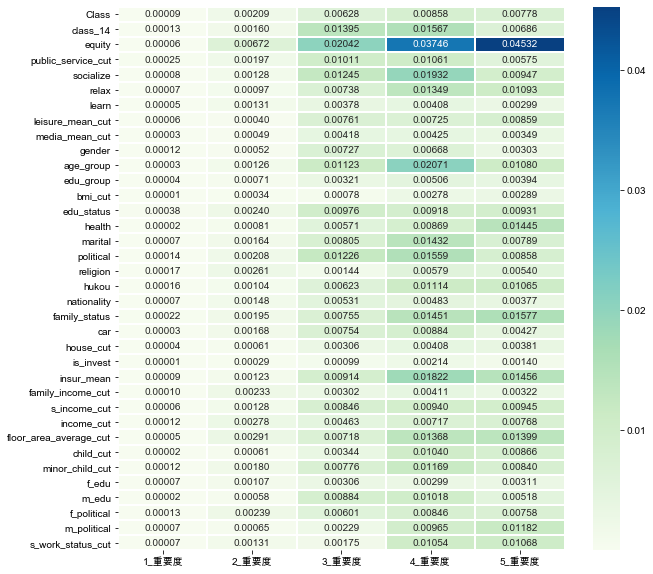

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深-value所有去情绪.png",dpi=300)

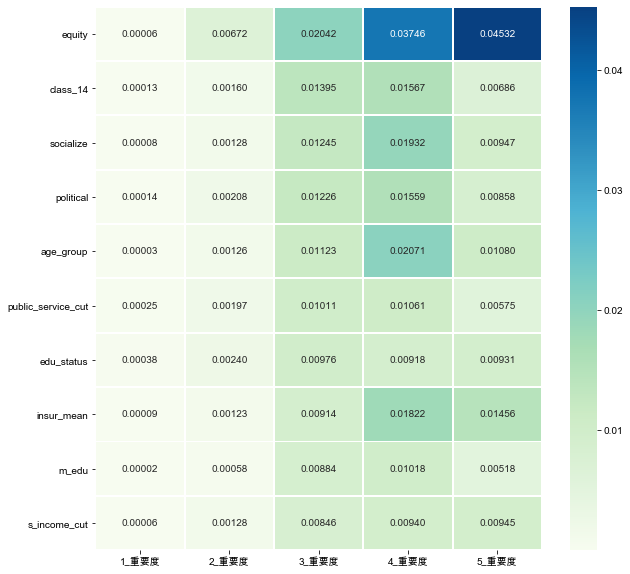

In [57]:
dfnew=dfnew.sort_values(by="3_重要度",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前10个所有去情绪另.png",dpi=300)

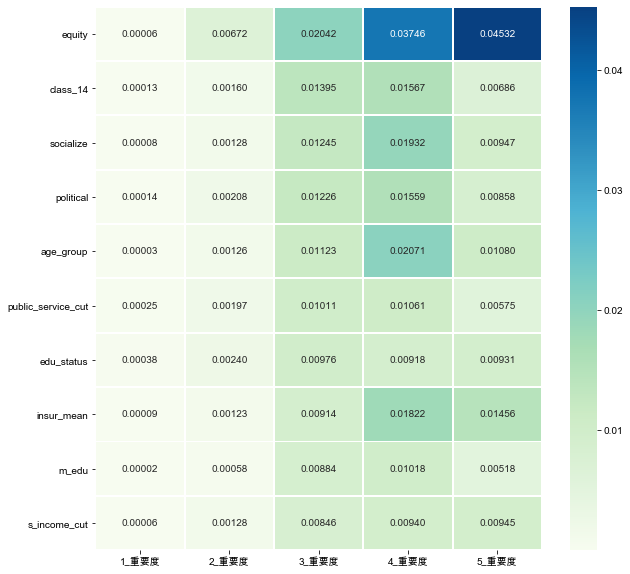

In [58]:
dfnew=dfnew.sort_values(by="3_重要度",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前10个所有去情绪另.pdf",dpi=300)

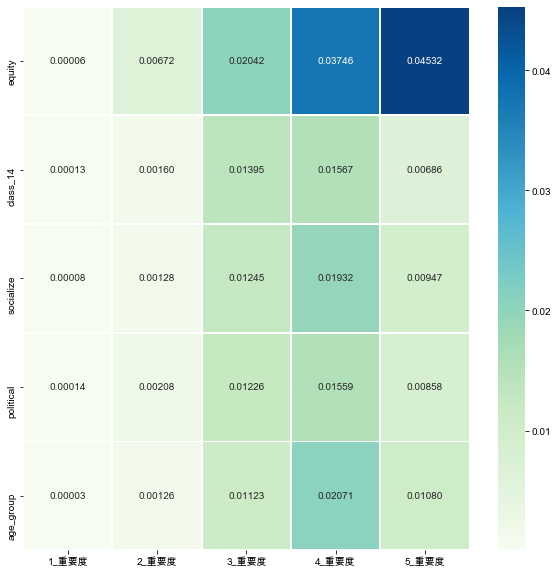

In [59]:
dfnew=dfnew.sort_values(by="3_重要度",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个所有去情绪另.png",dpi=300)

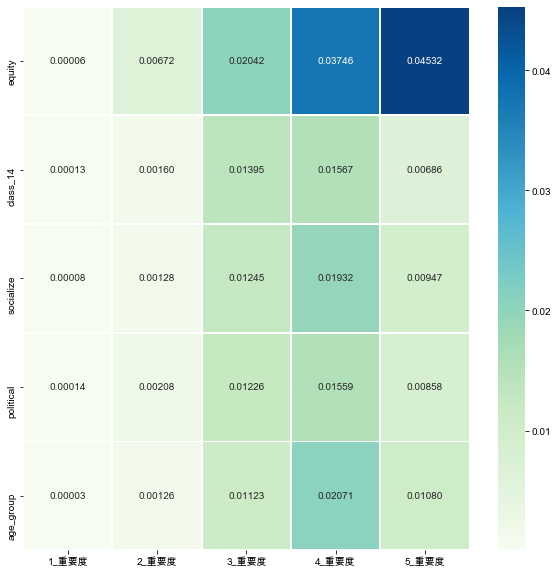

In [60]:
dfnew=dfnew.sort_values(by="3_重要度",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个所有去情绪另.pdf",dpi=300)